1. Load your dataset. 

2. Use hierarchical clustering to identify the inherent groupings within your data.

3. Plot the clusters. 

4. Plot the dendrogram. Use K-means clustering. 

5. Try different K values and select the best one. 

6. Plot the clusters. 

7. Compare the two results. 

Bonus: Search for another validation metric

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc

In [74]:
# Load the dataset
data = pd.read_csv("credit_card.csv")

In [75]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [76]:
# Dealing with missing data
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(), inplace=True)

/var/folders/d_/t3bly55j18977vf_nf_31x5h0000gn/T/ipykernel_98916/3527764884.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(), inplace=True)


In [77]:
# Dealing with missing data
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(), inplace=True)

/var/folders/d_/t3bly55j18977vf_nf_31x5h0000gn/T/ipykernel_98916/456355128.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(), inplace=True)


In [78]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [79]:
# Dropping the id column
data.drop('CUST_ID', axis=1, inplace=True)

In [81]:
# Using Hierarchical clustering to identify the inherent groupings in our data
model = AgglomerativeClustering(n_clusters=4, linkage='ward')
clust_labels = model.fit_predict(data)

In [82]:
# Get the Agglomerative labels
agglomerative = pd.DataFrame(clust_labels)
agglomerative.head()

,0
0,3
1,0
2,0
3,0
4,3


In [83]:
new_data = data.join(agglomerative)

In [84]:
new_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,0
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,3
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,3
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,3
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,3


In [85]:
new_data[0].value_counts()

0
3    5400
0    3067
1     460
2      23
Name: count, dtype: int64

In [86]:
# Renaming the cluster columns
new_data.rename(columns={0: 'Agglomerative_label'}, inplace=True)

In [87]:
new_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Agglomerative_label
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


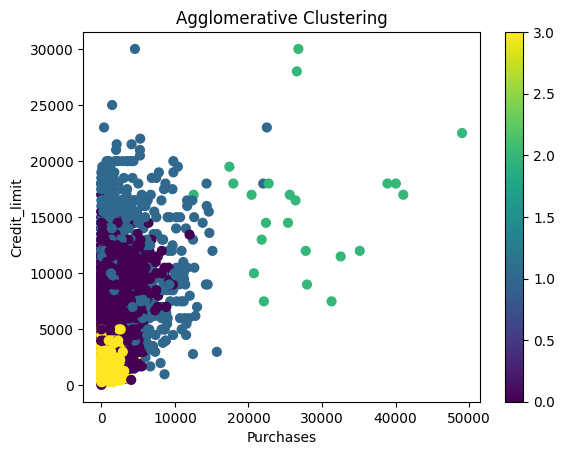

In [88]:
# Plot the clusters
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(new_data['PURCHASES'], new_data['CREDIT_LIMIT'], c=new_data['Agglomerative_label'],s=40)
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('Purchases')
ax.set_ylabel('Credit_limit')
plt.colorbar(scatter)


In [89]:
# Calculating Kmeans
sum_of_distance = []
k = range(1,10)
for i in k:
    km = KMeans(n_clusters=i)
    km = km.fit(new_data)
    sum_of_distance.append(km.inertia_)

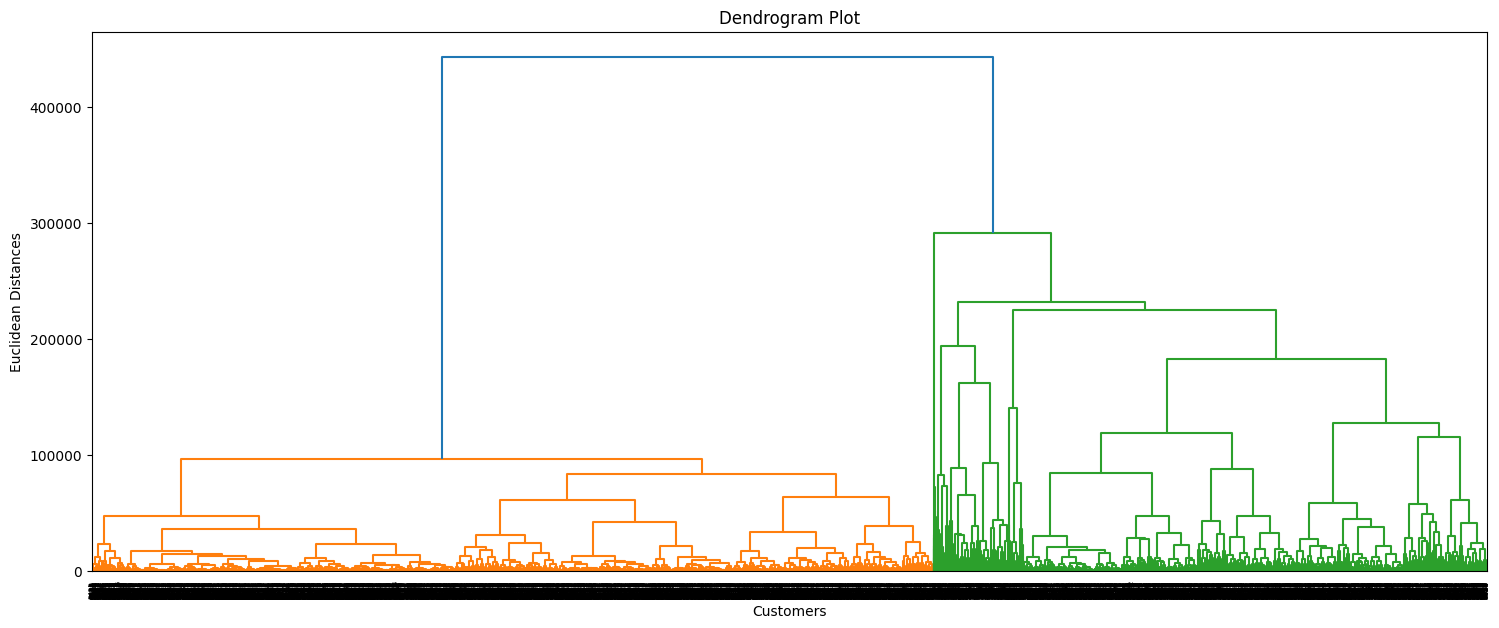

In [90]:
# Plot the dendrogram
plt.figure(figsize=(18,7))

dend = shc.dendrogram(shc.linkage(data, method='ward'))
plt.title('Dendrogram Plot')
plt.ylabel('Euclidean Distances')
plt.xlabel('Customers')
plt.show()

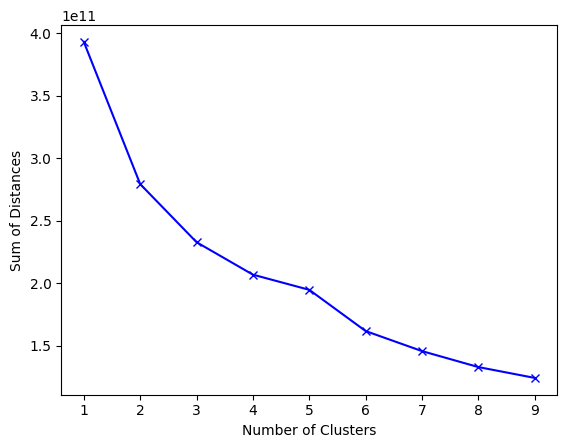

In [91]:
plt.plot(k,sum_of_distance, 'bx-')
plt.xlabel("Number of Clusters")
plt.ylabel('Sum of Distances')
plt.show()

In [92]:
# Predicting K labels
km = KMeans(n_clusters=4)
k_labels = km.fit_predict(new_data)

In [93]:
# Adding K_labels to the datasets
new_data['k_labels'] = pd.Series(k_labels)

Comparing the two Algorithms

In [94]:
# The labels generasted from the KMeans clustering algorithms
new_data['k_labels'].value_counts()

k_labels
3    5723
0    2340
2     767
1     120
Name: count, dtype: int64

In [96]:
# The labels generated by the agglomerative cluster algorithms
new_data['Agglomerative_label'].value_counts()

Agglomerative_label
3    5400
0    3067
1     460
2      23
Name: count, dtype: int64

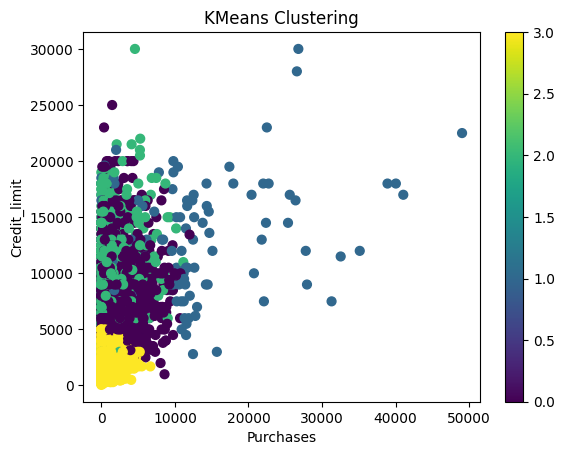

In [97]:
# Plot KMeans Cluster
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(new_data['PURCHASES'], new_data['CREDIT_LIMIT'],c=new_data['k_labels'],s=40)
ax.set_title("KMeans Clustering")
ax.set_xlabel('Purchases')
ax.set_ylabel('Credit_limit')
plt.colorbar(scatter)

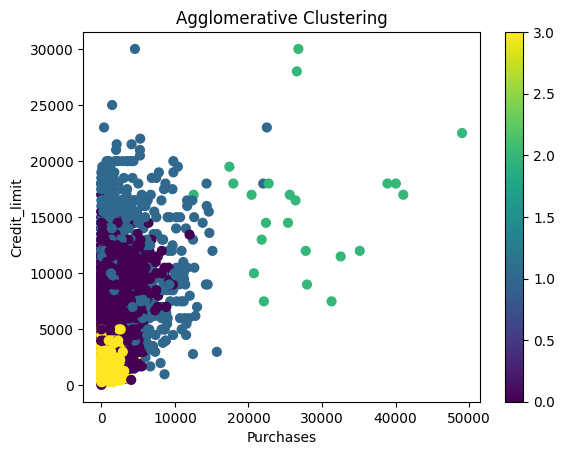

In [98]:
# Plot the clusters
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(new_data['PURCHASES'], new_data['CREDIT_LIMIT'], c=new_data['Agglomerative_label'],s=40)
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('Purchases')
ax.set_ylabel('Credit_limit')
plt.colorbar(scatter)

Trying another validation metric

Davies-Bouldin index (DB index). The DB index measures the average similarity between each cluster and its most similar cluster, where similarity is defined as the ratio of within-cluster distances to between-cluster distances. A lower DB index indicates better clustering, with values closer to zero representing better separation between clusters.

In [99]:
from sklearn.metrics import davies_bouldin_score

In [100]:
# COmputing the Davie-Bouldin index for hierarchical clustering
db_hie = davies_bouldin_score(new_data,clust_labels)

In [101]:
print(f'Davies-Bouldin index for hierarchical clustering is {db_hie}')

Davies-Bouldin index for hierarchical clustering is 1.49039409020487


In [102]:
# COmputing the Davie-Bouldin index for K-means clustering
db_kmeans = davies_bouldin_score(new_data, k_labels)

In [103]:
print(f'Davies-Bouldin index for k-means clustering is {db_kmeans}')

Davies-Bouldin index for k-means clustering is 1.402645057702901


The Davies-Bouldin index for hierarchical clustering of 1.49 suggests that there is some overlapping or similarity between the clusters, but its not excessively high. Whereas the Davies-Bouldin index for K-means clustering of 1.40 suggest that the k-means have better seperation compared to the hierarchical clustering.